In [2]:
import numpy as np
import statsmodels as sm
from statsmodels.tsa.api import VAR, DynamicVAR
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore",category=FutureWarning)

/home/cassio/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
dados = pd.read_csv('~/Documents/Estágio Docência/Aula VAR/Python/us_macro_quarterly.csv')
dados.head()

,Ano,Trimestre,GDPC96,JAPAN_IP,PCECTPI,GS10,GS1,TB3MS,UNRATE,EXUSUK,CPIAUCSL
0,1957,1,2851.778,8.414363,16.449,3.403333,3.390000,3.096667,3.933333,NaN,27.776667
1,1957,2,2845.453,9.097347,16.553,3.626667,3.540000,3.140000,4.100000,NaN,28.013333
2,1957,3,2873.169,9.042708,16.687,3.926667,3.963333,3.353333,4.233333,NaN,28.263333
3,1957,4,2843.718,8.796834,16.773,3.633333,3.586667,3.310000,4.933333,NaN,28.400000
4,1958,1,2770.000,8.632918,16.978,3.040000,2.160000,1.756667,6.300000,NaN,28.736667


In [4]:
# organizando as datas
datas = dados[['Ano', 'Trimestre']].astype(int).astype(str)
datas.head()

,Ano,Trimestre
0,1957,1
1,1957,2
2,1957,3
3,1957,4
4,1958,1


In [5]:
trimestral = datas["Ano"] + "Q" + datas["Trimestre"]
trimestral.head()

0    1957Q1
1    1957Q2
2    1957Q3
3    1957Q4
4    1958Q1
dtype: object

In [6]:
from statsmodels.tsa.base.datetools import dates_from_str
trimestral_index = dates_from_str(trimestral)

# Indexando a base de dados como o trimestral_index
dados.index = trimestral_index
dados.head()

,Ano,Trimestre,GDPC96,JAPAN_IP,PCECTPI,GS10,GS1,TB3MS,UNRATE,EXUSUK,CPIAUCSL
1957-03-31,1957,1,2851.778,8.414363,16.449,3.403333,3.390000,3.096667,3.933333,NaN,27.776667
1957-06-30,1957,2,2845.453,9.097347,16.553,3.626667,3.540000,3.140000,4.100000,NaN,28.013333
1957-09-30,1957,3,2873.169,9.042708,16.687,3.926667,3.963333,3.353333,4.233333,NaN,28.263333
1957-12-31,1957,4,2843.718,8.796834,16.773,3.633333,3.586667,3.310000,4.933333,NaN,28.400000
1958-03-31,1958,1,2770.000,8.632918,16.978,3.040000,2.160000,1.756667,6.300000,NaN,28.736667


In [7]:
PIB = dados["GDPC96"]
T3  = dados["TB3MS"]
T10 = dados["GS10"]


In [8]:
Y = 400*np.log(PIB).diff(periods=1).dropna()
X = T10 - T3

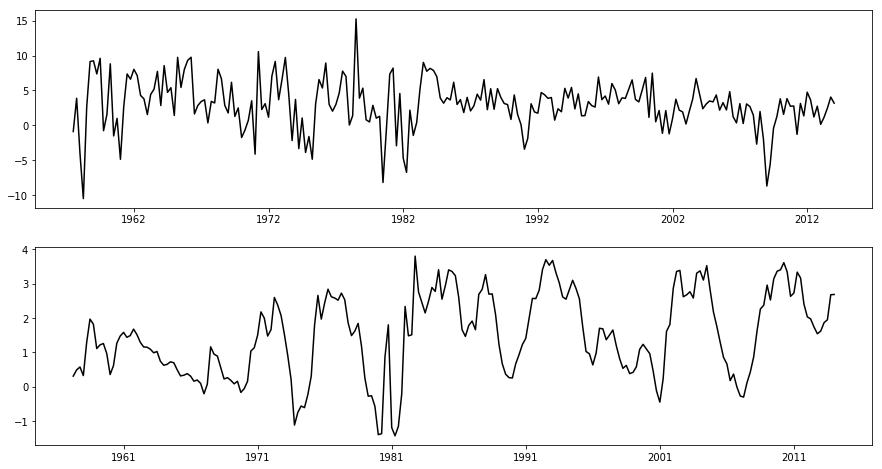

In [9]:
fig = plt.figure(figsize=(15,8))
p1 = fig.add_subplot(2,1,1)
plt.plot(Y, color="k")
p2 = fig.add_subplot(2,1,2)
plt.plot(X, color="k")
plt.show()


In [10]:
# Seleciona os valores de 1980:3 até 2012:04
XX = X[94:len(X)-4] 
YY = Y[93:len(Y)-4]

VAR_dados = pd.concat([YY,XX], axis=1, )
VAR_dados.columns = ["GDPGrowth","TSpread"]
VAR_dados.head()

,GDPGrowth,TSpread
1980-09-30,-0.606818,1.800000
1980-12-31,7.343607,-1.190000
1981-03-31,8.200270,-1.430000
1981-06-30,-2.933505,-1.156667
1981-09-30,4.562976,-0.206667


In [11]:
# Cria um objeto com vários métodos do VAR
modelo = VAR(VAR_dados)

In [12]:
# Ordem p do VAR
modelo.select_order()

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0         2.104        2.151        8.201        2.123
1      -0.03595       0.1057       0.9647      0.02156
2      -0.2178*     0.01827*      0.8044*     -0.1220*
3       -0.1856       0.1449       0.8308     -0.05142
4       -0.1679       0.2570       0.8459     0.004590
5       -0.1438       0.3756       0.8670      0.06703
6      -0.08892       0.5249       0.9166       0.1603
7      -0.03409       0.6742       0.9692       0.2535
8      -0.02560       0.7771       0.9788       0.3003
9      -0.04539       0.8517       0.9612       0.3188
10    -0.006682       0.9849        1.001       0.3959
11     -0.04891        1.037       0.9622       0.3920
12     -0.05127        1.129       0.9628       0.4280
13     -0.01627        1.259        1.001       0.5013
* Minimum



{'aic': 2, 'bic': 2, 'fpe': 2, 'hqic': 2}

In [13]:
# Estima o VAR de ordem 2
VAR_est = modelo.fit(2)
VAR_est.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 10, Oct, 2018
Time:                     15:54:44
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.654988
Nobs:                     128.000    HQIC:                  0.522704
Log likelihood:          -380.907    FPE:                    1.54073
AIC:                     0.432174    Det(Omega_mle):         1.42706
--------------------------------------------------------------------
Results for equation GDPGrowth
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.516344         0.472841            1.092           0.277
L1.GDPGrowth         0.289553         0.083649            3.462           0.001
L1.TSpread          -0.902549         0.369649           -2.

In [14]:
irf = VAR_est.irf(10)

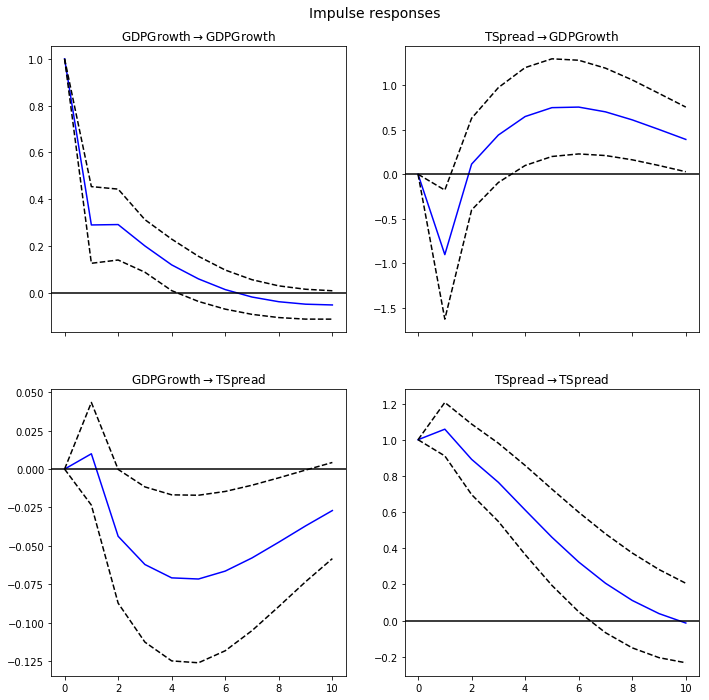

In [15]:
irf.plot()